<a href="https://colab.research.google.com/github/RayTjan/Roost/blob/main/Roost_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Retrieval

### Fetching

In [1]:
pip install kaggle

ERROR: Operation cancelled by user


In [2]:
mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download nikhileswarkomati/suicide-watch

 69% 42.0M/60.6M [00:00<00:00, 51.8MB/s]
100% 60.6M/60.6M [00:00<00:00, 77.8MB/s]


In [6]:
! unzip suicide-watch.zip

Archive:  suicide-watch.zip
  inflating: Suicide_Detection.csv   


### Exploratory Analysis

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Suicide_Detection.csv')
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


,Unnamed: 0
count,232074.000000
mean,174152.863518
std,100500.425362
min,2.000000
25%,87049.250000
50%,174358.500000
75%,261285.750000
max,348110.000000


In [ ]:
df.isna()

,Unnamed: 0,text,class
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
232069,False,False,False
232070,False,False,False
232071,False,False,False
232072,False,False,False


In [ ]:
df.isna().values.any()

False

In [ ]:
target_names = list(df['class'].unique())

print(target_names)

['suicide', 'non-suicide']


In [ ]:
df['class'].value_counts()

non-suicide    116037
suicide        116037
Name: class, dtype: int64

In [ ]:
df['label'] = np.where(df['class'] == "suicide", 1, 0)
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,text,class,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,Am I weird I don't get affected by compliments...,non-suicide,0
2,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,i need helpjust help me im crying so hard,suicide,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1


In [ ]:
pip install --user -U nltk

### Text Pre-processing

In [ ]:
from sklearn.model_selection import train_test_split

# Selecting 50% of dataset for training and test set with 4:1 proportion
df_samples = df.sample(frac=0.5, replace=True, random_state=10)
x_train, x_test, y_train, y_test = train_test_split(df_samples['text'], df_samples['label'], test_size=0.2, random_state=10)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

# Removes url in text
def remove_url(text):
  clean_text = re.sub(r'(http|ftp|ssh|www)\S+', '', text)
  return clean_text

# Removes emoji in text
def remove_emoji(text):
  emoji_pattern = re.compile(pattern="["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r'', text)

# Set stop words
def set_stop_words():
  stop_words_nltk = set(stopwords.words('english'))
  punctuations = set(string.punctuation)
  stop_words_extra = {'cannot', 'filler', 'wa'}
  stop_words = stop_words_nltk.union(stop_words_extra, punctuations)
  return stop_words

stop_words = set_stop_words()

# Remove affixes (prefix and suffix) to return to root words
def remove_affixes_tenses(text) :
  tokens = TweetTokenizer().tokenize(text)
  clean_text = ' '.join([WordNetLemmatizer().lemmatize(word, 'v') for word in tokens])
  return clean_text

# Defining corpus for English words from NLTK
corpus_english = set(nltk.corpus.words.words())

# Remove non-English words based on the defined corpus above
def remove_non_english(text) :
  clean_text = ' '.join(w for w in nltk.wordpunct_tokenize(text) \
          if w.lower() in corpus_english or not w.isalpha())
  return clean_text

# Remove punctuations
def remove_punct(text):
  clean_text = ''.join([char for char in text if char not in string.punctuation])
  clean_text = re.sub('[0-9]+','', text)
  return clean_text

# Apply tokenization
def tokenization(text):
  clean_text = re.split('\W+', text)
  return clean_text

# Removing stop words
def remove_stop_words(text):
  clean_text = [word for word in text if word not in stop_words]
  return clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
x_train = x_train.apply(lambda text: text.lower())
x_train = x_train.apply(lambda text: remove_url(text))
x_train = x_train.apply(lambda text: remove_emoji(text))
x_train = x_train.apply(lambda text: remove_affixes_tenses(text))
x_train = x_train.apply(lambda text: remove_non_english(text))
x_train = x_train.apply(lambda text: remove_punct(text))
x_train = x_train.apply(lambda text: tokenization(text))
x_train = x_train.apply(lambda text: remove_stop_words(text))
x_train.head()

73592     [hello, people, want, ask, give, advice, talk,...
169590    [server, ruin, log, survival, server, tree, to...
109136    [seek, help, follow, sub, scan, talk, tip, wan...
54104     [mad, confident, important, test, take, today,...
203632    [anxiety, unbearable, spend, whole, day, mind,...
Name: text, dtype: object

# Stemming

In [ ]:
from nltk.stem import SnowballStemmer

# Apply stemming

stemmer = nltk.SnowballStemmer(language='english')

def stemming(nonstop_words):
  words = [stemmer.stem(word) for word in nonstop_words]
  text = ' '.join(words)
  return text

x_train = x_train.apply(lambda text: stemming(text))

# Frequency Measurement

### Fetch Most Frequent Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_n_gram(corpus, ngram_range, max_features=None):
  vectorizer = CountVectorizer(ngram_range=ngram_range,stop_words=stop_words,max_features=max_features).fit(corpus)
  bag_of_words = vectorizer.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq

### 1-Gram CountVectorizer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Keyword    150 non-null    object
 1   Frequency  150 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


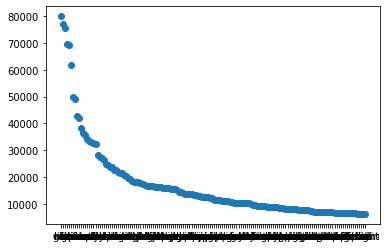

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Apply 1-Gram CountVectorizer

one_gram_fetch = get_n_gram(x_train, (1,1), 150)
one_gram_df = pd.DataFrame(one_gram_fetch, columns=['Keyword', 'Frequency'])

one_gram_df.info()
one_gram_df.describe()
one_gram_df.loc[:]
plt.scatter(one_gram_df['Keyword'], one_gram_df['Frequency'])
plt.show()

In [ ]:
one_gram_vectorizer = CountVectorizer(ngram_range=(1,1), max_features=150)
one_gram_training_count = one_gram_vectorizer.fit_transform(x_train)
print("List of extracted tokens")
print(one_gram_vectorizer.get_feature_names_out())
one_gram_vectorizer.vocabulary_

List of extracted tokens
['abl' 'actual' 'ago' 'alon' 'alreadi' 'also' 'alway' 'anoth' 'anyon'
 'anyth' 'around' 'ask' 'away' 'back' 'bad' 'becom' 'best' 'better'
 'break' 'call' 'care' 'chang' 'come' 'could' 'cri' 'dad' 'day' 'depress'
 'die' 'dont' 'els' 'end' 'enough' 'even' 'ever' 'everi' 'everyon'
 'everyth' 'famili' 'feel' 'felt' 'final' 'find' 'first' 'friend' 'get'
 'girl' 'give' 'go' 'good' 'guy' 'happen' 'happi' 'hard' 'hate' 'help'
 'home' 'hope' 'hurt' 'job' 'keep' 'kill' 'know' 'last' 'leav' 'let'
 'life' 'like' 'littl' 'live' 'long' 'look' 'lose' 'lot' 'love' 'make'
 'mani' 'mayb' 'mean' 'mental' 'might' 'mind' 'move' 'much' 'need' 'never'
 'new' 'night' 'noth' 'old' 'one' 'pain' 'parent' 'past' 'peopl' 'person'
 'place' 'plan' 'pleas' 'point' 'post' 'pretti' 'probabl' 'put' 'read'
 'realli' 'reason' 'right' 'sad' 'say' 'scar' 'school' 'see' 'seem' 'self'
 'sinc' 'sleep' 'someon' 'someth' 'sorri' 'start' 'still' 'stop' 'suicid'
 'sure' 'take' 'talk' 'tell' 'thank' 'thing'

{'abl': 0,
 'actual': 1,
 'ago': 2,
 'alon': 3,
 'alreadi': 4,
 'also': 5,
 'alway': 6,
 'anoth': 7,
 'anyon': 8,
 'anyth': 9,
 'around': 10,
 'ask': 11,
 'away': 12,
 'back': 13,
 'bad': 14,
 'becom': 15,
 'best': 16,
 'better': 17,
 'break': 18,
 'call': 19,
 'care': 20,
 'chang': 21,
 'come': 22,
 'could': 23,
 'cri': 24,
 'dad': 25,
 'day': 26,
 'depress': 27,
 'die': 28,
 'dont': 29,
 'els': 30,
 'end': 31,
 'enough': 32,
 'even': 33,
 'ever': 34,
 'everi': 35,
 'everyon': 36,
 'everyth': 37,
 'famili': 38,
 'feel': 39,
 'felt': 40,
 'final': 41,
 'find': 42,
 'first': 43,
 'friend': 44,
 'get': 45,
 'girl': 46,
 'give': 47,
 'go': 48,
 'good': 49,
 'guy': 50,
 'happen': 51,
 'happi': 52,
 'hard': 53,
 'hate': 54,
 'help': 55,
 'home': 56,
 'hope': 57,
 'hurt': 58,
 'job': 59,
 'keep': 60,
 'kill': 61,
 'know': 62,
 'last': 63,
 'leav': 64,
 'let': 65,
 'life': 66,
 'like': 67,
 'littl': 68,
 'live': 69,
 'long': 70,
 'look': 71,
 'lose': 72,
 'lot': 73,
 'love': 74,
 'make': 75,


In [ ]:
print("Description of the word occurences data structure:")
print(type(one_gram_training_count))
print("(Documents, Tokens)")
print(one_gram_training_count.shape)
print("Word occurrences of the first document:")
print(one_gram_training_count[0])

Description of the word occurences data structure:
<class 'scipy.sparse.csr.csr_matrix'>
(Documents, Tokens)
(92829, 150)
Word occurrences of the first document:
  (0, 94)	4
  (0, 139)	2
  (0, 11)	1
  (0, 47)	2
  (0, 126)	2
  (0, 105)	1
  (0, 33)	3
  (0, 62)	2
  (0, 6)	1
  (0, 63)	1
  (0, 45)	1
  (0, 140)	1
  (0, 72)	1
  (0, 44)	1
  (0, 48)	1
  (0, 52)	1
  (0, 117)	1
  (0, 23)	1


###  2-Gram CountVectorizer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Keyword    150 non-null    object
 1   Frequency  150 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


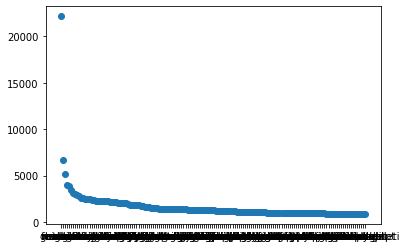

In [ ]:
# Apply 2-Gram CountVectorizer

two_gram_fetch = get_n_gram(x_train, (2,2), 150)
two_gram_df = pd.DataFrame(two_gram_fetch, columns=['Keyword', 'Frequency'])

two_gram_df.info()
two_gram_df.describe()
two_gram_df.loc[:]
plt.scatter(two_gram_df['Keyword'], two_gram_df['Frequency'])
plt.show()

In [ ]:
two_gram_vectorizer = CountVectorizer(ngram_range=(2,2), max_features=150)
two_gram_training_count = two_gram_vectorizer.fit_transform(x_train)
print("List of extracted tokens")
print(two_gram_vectorizer.get_feature_names_out())
two_gram_vectorizer.vocabulary_

List of extracted tokens
['act like' 'anyon els' 'attempt suicid' 'bacon bacon' 'best friend'
 'cake cake' 'come back' 'commit suicid' 'cum cum' 'day ago' 'day day'
 'depress anxieti' 'die let' 'die want' 'dont know' 'dont want' 'end life'
 'entir life' 'even get' 'even know' 'even though' 'ever sinc' 'everi day'
 'everi singl' 'everi time' 'everyon els' 'feel alon' 'feel bad'
 'feel better' 'feel like' 'feel way' 'felt like' 'first time' 'get back'
 'get better' 'get help' 'get job' 'get wors' 'go away' 'go back' 'go get'
 'go go' 'go kill' 'go school' 'go sleep' 'good enough' 'high school'
 'keep go' 'know feel' 'know get' 'know go' 'know know' 'know peopl'
 'know want' 'know would' 'last night' 'last time' 'last year' 'let die'
 'let go' 'life feel' 'life get' 'life go' 'life want' 'like get'
 'like go' 'like one' 'like want' 'live life' 'live like' 'long time'
 'look forward' 'look like' 'love love' 'make feel' 'make happi'
 'make sens' 'make sure' 'make want' 'mani peopl' 'mani ti

{'act like': 0,
 'anyon els': 1,
 'attempt suicid': 2,
 'bacon bacon': 3,
 'best friend': 4,
 'cake cake': 5,
 'come back': 6,
 'commit suicid': 7,
 'cum cum': 8,
 'day ago': 9,
 'day day': 10,
 'depress anxieti': 11,
 'die let': 12,
 'die want': 13,
 'dont know': 14,
 'dont want': 15,
 'end life': 16,
 'entir life': 17,
 'even get': 18,
 'even know': 19,
 'even though': 20,
 'ever sinc': 21,
 'everi day': 22,
 'everi singl': 23,
 'everi time': 24,
 'everyon els': 25,
 'feel alon': 26,
 'feel bad': 27,
 'feel better': 28,
 'feel like': 29,
 'feel way': 30,
 'felt like': 31,
 'first time': 32,
 'get back': 33,
 'get better': 34,
 'get help': 35,
 'get job': 36,
 'get wors': 37,
 'go away': 38,
 'go back': 39,
 'go get': 40,
 'go go': 41,
 'go kill': 42,
 'go school': 43,
 'go sleep': 44,
 'good enough': 45,
 'high school': 46,
 'keep go': 47,
 'know feel': 48,
 'know get': 49,
 'know go': 50,
 'know know': 51,
 'know peopl': 52,
 'know want': 53,
 'know would': 54,
 'last night': 55,
 '

In [ ]:
print("Description of the word occurences data structure:")
print(type(two_gram_training_count))
print("(Documents, Tokens)")
print(two_gram_training_count.shape)
print("Word occurrences of the first document:")
print(two_gram_training_count[0])

Description of the word occurences data structure:
<class 'scipy.sparse.csr.csr_matrix'>
(Documents, Tokens)
(92829, 150)
Word occurrences of the first document:
  (0, 112)	2
  (0, 19)	1
  (0, 94)	1


# Algorithms Implementation

In [ ]:
# Storing all training texts and labels into a variable
df_samples_text = df_samples['text']
df_samples_label = df_samples['label']

## General Function

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
import time

kfold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=10)

transformer = TfidfTransformer()
one_gram_vectorizer = CountVectorizer(ngram_range=(1,1), max_features=150)
two_gram_vectorizer = CountVectorizer(ngram_range=(2,2), max_features=150)

def measure_accuracy(algorithm, vectorizer, dense=True):
  list_time_train = []
  list_time_predict = []
  list_accuracy_score = []
  list_precision_score = []
  list_recall_score = []
  list_f_measure_score = []
  i = 1
  for train_index, test_index in kfold.split(df_samples_text, df_samples_label):
    x_train, x_test =  df_samples_text.iloc[train_index], df_samples_text.iloc[test_index]
    y_train, y_test = df_samples_label.iloc[train_index], df_samples_label.iloc[test_index]
    model_training_count = vectorizer.fit_transform(x_train)
    model_new_count = vectorizer.transform(x_test)
    if dense:
      model_training_tfidf = transformer.fit_transform(model_training_count).todense()
    else:
      model_training_tfidf = transformer.fit_transform(model_training_count)

    t0 = time.time()
    model = algorithm.fit(model_training_tfidf, y_train)
    train_time = round(time.time()-t0, 3)
    list_time_train.append(train_time)
    print(f'Predict time of fold {i}: {train_time}s')

    model_tfidf = transformer.transform(model_new_count)

    t1 = time.time()
    model_prediction = model.predict(model_tfidf)
    predict_time = round(time.time()-t0, 3)
    list_time_predict.append(predict_time)
    print(f'Predict time of fold {i}: {predict_time}s')

    current_accuracy_score = accuracy_score(y_test, model_prediction)
    current_precision_score = precision_score(y_test, model_prediction)
    current_recall_score = recall_score(y_test, model_prediction)
    current_f_measure_score = f1_score(y_test, model_prediction)
    list_accuracy_score.append(current_accuracy_score)
    list_precision_score.append(current_precision_score)
    list_recall_score.append(current_recall_score)
    list_f_measure_score.append(current_f_measure_score)
    print(f'Accuracy of fold {i}: {current_accuracy_score}')
    print(f'Precision of fold {i}: {current_precision_score}')
    print(f'Recall of fold {i}: {current_recall_score}')
    print(f'F-measure of fold {i}: {current_f_measure_score}')
    print(metrics.classification_report(y_test, model_prediction, target_names=['non_suicide','suicide']))
    i += 1
  average_train_time = sum(list_time_train)/len(list_time_train)
  average_predict_time = sum(list_time_predict)/len(list_time_predict)
  average_accuracy_score = sum(list_accuracy_score)/len(list_accuracy_score)
  average_precision_score = sum(list_precision_score)/len(list_precision_score)
  average_recall_score = sum(list_recall_score)/len(list_recall_score)
  average_f_measure_score = sum(list_f_measure_score)/len(list_f_measure_score)
  average_values = {'average_train_time':average_train_time,'average_predict_time':average_predict_time,
                    'average_accuracy':average_accuracy_score,'average_precision':average_precision_score,
                    'average_recall':average_recall_score,'average_f_measure':average_f_measure_score}
  return average_values

## Multinomial Naive Bayes

In [ ]:
one_gram_mnb_average = measure_accuracy(MultinomialNB(), one_gram_vectorizer)

Predict time of fold 1: 0.064s
Predict time of fold 1: 0.078s
Accuracy of fold 1: 0.8045501551189245
Precision of fold 1: 0.7753522217061465
Recall of fold 1: 0.8597424892703862
F-measure of fold 1: 0.8153695864539238
              precision    recall  f1-score   support

 non_suicide       0.84      0.75      0.79      5779
     suicide       0.78      0.86      0.82      5825

    accuracy                           0.80     11604
   macro avg       0.81      0.80      0.80     11604
weighted avg       0.81      0.80      0.80     11604

Predict time of fold 2: 0.066s
Predict time of fold 2: 0.081s
Accuracy of fold 2: 0.8016201309893141
Precision of fold 2: 0.769254562326013
Recall of fold 2: 0.8599585062240664
F-measure of fold 2: 0.8120816326530612
              precision    recall  f1-score   support

 non_suicide       0.84      0.74      0.79      5820
     suicide       0.77      0.86      0.81      5784

    accuracy                           0.80     11604
   macro avg       0

In [ ]:
one_gram_mnb_average

{'average_accuracy': 0.8051311572665678,
 'average_f_measure': 0.8157687804644159,
 'average_precision': 0.7754036927240117,
 'average_predict_time': 0.08169999999999998,
 'average_recall': 0.860602600878208,
 'average_train_time': 0.06613333333333334}

In [ ]:
two_gram_mnb_average = measure_accuracy(MultinomialNB(), two_gram_vectorizer)

Predict time of fold 1: 0.083s
Predict time of fold 1: 0.092s
Accuracy of fold 1: 0.6527059634608756
Precision of fold 1: 0.6179524247601524
Recall of fold 1: 0.8072103004291845
F-measure of fold 1: 0.7000148875986304
              precision    recall  f1-score   support

 non_suicide       0.72      0.50      0.59      5779
     suicide       0.62      0.81      0.70      5825

    accuracy                           0.65     11604
   macro avg       0.67      0.65      0.64     11604
weighted avg       0.67      0.65      0.64     11604

Predict time of fold 2: 0.064s
Predict time of fold 2: 0.071s
Accuracy of fold 2: 0.6539124439848328
Precision of fold 2: 0.6172413793103448
Recall of fold 2: 0.8046334716459198
F-measure of fold 2: 0.698589012308616
              precision    recall  f1-score   support

 non_suicide       0.72      0.50      0.59      5820
     suicide       0.62      0.80      0.70      5784

    accuracy                           0.65     11604
   macro avg       0

In [ ]:
two_gram_mnb_average

{'average_accuracy': 0.6599016092239772,
 'average_f_measure': 0.7037197958416961,
 'average_precision': 0.624727918898507,
 'average_predict_time': 0.07606666666666666,
 'average_recall': 0.8056295394147419,
 'average_train_time': 0.06876666666666667}

## Linear SVM

In [ ]:
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV
linearSVC = CalibratedClassifierCV(svm.LinearSVC())

In [ ]:
one_gram_svc_average = measure_accuracy(linearSVC, one_gram_vectorizer, dense=False)
print(f'1-Gram Linear Support Vector Classification Average: {one_gram_svc_average}')

Predict time of fold 1: 7.295s
Predict time of fold 1: 7.318s
Accuracy of fold 1: 0.8818510858324715
Precision of fold 1: 0.8955595026642984
Recall of fold 1: 0.865579399141631
F-measure of fold 1: 0.8803142732431254
              precision    recall  f1-score   support

 non_suicide       0.87      0.90      0.88      5779
     suicide       0.90      0.87      0.88      5825

    accuracy                           0.88     11604
   macro avg       0.88      0.88      0.88     11604
weighted avg       0.88      0.88      0.88     11604

Predict time of fold 2: 6.942s
Predict time of fold 2: 6.964s
Accuracy of fold 2: 0.8751292657704239
Precision of fold 2: 0.8882321332616873
Recall of fold 2: 0.8573651452282157
F-measure of fold 2: 0.8725257323832145
              precision    recall  f1-score   support

 non_suicide       0.86      0.89      0.88      5820
     suicide       0.89      0.86      0.87      5784

    accuracy                           0.88     11604
   macro avg       0

In [ ]:
one_gram_svc_average

{'average_accuracy': 0.8783433720625351,
 'average_f_measure': 0.8767248340171574,
 'average_precision': 0.8909664975085206,
 'average_predict_time': 6.804633333333332,
 'average_recall': 0.8629486425559576,
 'average_train_time': 6.782700000000001}

In [ ]:
two_gram_svc_average = measure_accuracy(linearSVC, two_gram_vectorizer, dense=False)

Predict time of fold 1: 3.176s
Predict time of fold 1: 3.189s
Accuracy of fold 1: 0.8420372285418821
Precision of fold 1: 0.8578343492291144
Recall of fold 1: 0.8214592274678112
F-measure of fold 1: 0.8392528282031044
              precision    recall  f1-score   support

 non_suicide       0.83      0.86      0.84      5779
     suicide       0.86      0.82      0.84      5825

    accuracy                           0.84     11604
   macro avg       0.84      0.84      0.84     11604
weighted avg       0.84      0.84      0.84     11604

Predict time of fold 2: 3.347s
Predict time of fold 2: 3.359s
Accuracy of fold 2: 0.8354877628403998
Precision of fold 2: 0.855569829326482
Recall of fold 2: 0.8060165975103735
F-measure of fold 2: 0.8300543042820262
              precision    recall  f1-score   support

 non_suicide       0.82      0.86      0.84      5820
     suicide       0.86      0.81      0.83      5784

    accuracy                           0.84     11604
   macro avg       0

In [ ]:
two_gram_svc_average

{'average_accuracy': 0.839261015663862,
 'average_f_measure': 0.8350935932564377,
 'average_precision': 0.8597337131909825,
 'average_predict_time': 3.4089000000000005,
 'average_recall': 0.8118396993664982,
 'average_train_time': 3.396033333333334}

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
one_gram_log_average = measure_accuracy(LogisticRegression(), one_gram_vectorizer, dense=False)

Predict time of fold 1: 1.358s
Predict time of fold 1: 1.367s
Accuracy of fold 1: 0.8816787314719062
Precision of fold 1: 0.8959445037353255
Recall of fold 1: 0.8647210300429184
F-measure of fold 1: 0.8800559098453743
              precision    recall  f1-score   support

 non_suicide       0.87      0.90      0.88      5779
     suicide       0.90      0.86      0.88      5825

    accuracy                           0.88     11604
   macro avg       0.88      0.88      0.88     11604
weighted avg       0.88      0.88      0.88     11604

Predict time of fold 2: 1.357s
Predict time of fold 2: 1.367s
Accuracy of fold 2: 0.8749569114098587
Precision of fold 2: 0.887775192410954
Recall of fold 2: 0.8575380359612724
F-measure of fold 2: 0.8723946882420193
              precision    recall  f1-score   support

 non_suicide       0.86      0.89      0.88      5820
     suicide       0.89      0.86      0.87      5784

    accuracy                           0.87     11604
   macro avg       0

In [ ]:
one_gram_log_average

{'average_accuracy': 0.8781394174219603,
 'average_f_measure': 0.8765235124191355,
 'average_precision': 0.890733170968979,
 'average_predict_time': 1.3567999999999996,
 'average_recall': 0.8627781422836129,
 'average_train_time': 1.3474666666666661}

In [ ]:
two_gram_log_average = measure_accuracy(LogisticRegression(), two_gram_vectorizer, dense=False)

Predict time of fold 1: 0.771s
Predict time of fold 1: 0.775s
Accuracy of fold 1: 0.8421234057221648
Precision of fold 1: 0.8595353862776878
Recall of fold 1: 0.8193991416309013
F-measure of fold 1: 0.8389875197750043
              precision    recall  f1-score   support

 non_suicide       0.83      0.87      0.85      5779
     suicide       0.86      0.82      0.84      5825

    accuracy                           0.84     11604
   macro avg       0.84      0.84      0.84     11604
weighted avg       0.84      0.84      0.84     11604

Predict time of fold 2: 0.782s
Predict time of fold 2: 0.787s
Accuracy of fold 2: 0.8353154084798345
Precision of fold 2: 0.8552559163456247
Recall of fold 2: 0.8060165975103735
F-measure of fold 2: 0.8299065420560748
              precision    recall  f1-score   support

 non_suicide       0.82      0.86      0.84      5820
     suicide       0.86      0.81      0.83      5784

    accuracy                           0.84     11604
   macro avg       

In [ ]:
two_gram_log_average

{'average_accuracy': 0.8394017791521364,
 'average_f_measure': 0.8350075997880206,
 'average_precision': 0.860919253632931,
 'average_predict_time': 0.7629666666666668,
 'average_recall': 0.8106253443824547,
 'average_train_time': 0.7582}

# Result Comparison

In [ ]:
average_comparison = {'Unigram Multinomial Naive Bayes': [one_gram_mnb_average['average_accuracy'],
                                                        one_gram_mnb_average['average_precision'],
                                                        one_gram_mnb_average['average_recall'],
                                                        one_gram_mnb_average['average_f_measure'],
                                                        one_gram_mnb_average['average_train_time'],
                                                        one_gram_mnb_average['average_predict_time']],
                    'Bigram Multinomial Naive Bayes': [two_gram_mnb_average['average_accuracy'],
                                                        two_gram_mnb_average['average_precision'],
                                                        two_gram_mnb_average['average_recall'],
                                                        two_gram_mnb_average['average_f_measure'],
                                                        two_gram_mnb_average['average_train_time'],
                                                        two_gram_mnb_average['average_predict_time']],
                    'Unigram Support Vector Classifier': [one_gram_svc_average['average_accuracy'],
                                                        one_gram_svc_average['average_precision'],
                                                        one_gram_svc_average['average_recall'],
                                                        one_gram_svc_average['average_f_measure'],
                                                        one_gram_svc_average['average_train_time'],
                                                        one_gram_svc_average['average_predict_time']],
                    'Bigram Support Vector Classifier': [two_gram_svc_average['average_accuracy'],
                                                        two_gram_svc_average['average_precision'],
                                                        two_gram_svc_average['average_recall'],
                                                        two_gram_svc_average['average_f_measure'],
                                                        two_gram_svc_average['average_train_time'],
                                                        two_gram_svc_average['average_predict_time']],
                    'Unigram Logistic Regression': [one_gram_log_average['average_accuracy'],
                                                        one_gram_log_average['average_precision'],
                                                        one_gram_log_average['average_recall'],
                                                        one_gram_log_average['average_f_measure'],
                                                        one_gram_log_average['average_train_time'],
                                                        one_gram_log_average['average_predict_time']],
                    'Bigram Logistic Regression': [two_gram_log_average['average_accuracy'],
                                                        two_gram_log_average['average_precision'],
                                                        two_gram_log_average['average_recall'],
                                                        two_gram_log_average['average_f_measure'],
                                                        two_gram_log_average['average_train_time'],
                                                        two_gram_log_average['average_predict_time']]}
average_comparison_df = pd.DataFrame.from_dict(average_comparison, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F-Measure', 'Train Time', 'Prediction Time'])
                                               
average_comparison_df

,Accuracy,Precision,Recall,F-Measure,Train Time,Prediction Time
Unigram Multinomial Naive Bayes,0.805131,0.775404,0.860603,0.815769,0.066133,0.081700
Bigram Multinomial Naive Bayes,0.659902,0.624728,0.805630,0.703720,0.068767,0.076067
Unigram Support Vector Classifier,0.878343,0.890966,0.862949,0.876725,6.782700,6.804633
Bigram Support Vector Classifier,0.839261,0.859734,0.811840,0.835094,3.396033,3.408900
Unigram Logistic Regression,0.878139,0.890733,0.862778,0.876524,1.347467,1.356800
Bigram Logistic Regression,0.839402,0.860919,0.810625,0.835008,0.758200,0.762967


KeyboardInterrupt: ignored

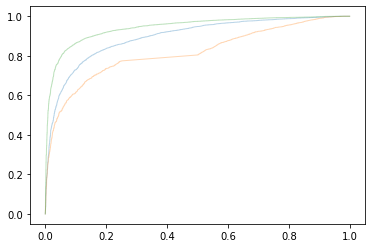

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import metrics

one_gram_mnb_tprs = []
one_gram_mnb_aucs = []
two_gram_mnb_tprs = []
two_gram_mnb_aucs = []
one_gram_svc_tprs = []
one_gram_svc_aucs = []
two_gram_svc_tprs = []
two_gram_svc_aucs = []
one_gram_log_tprs = []
one_gram_log_aucs = []
two_gram_log_tprs = []
two_gram_log_aucs = []
mean_fpr = np.linspace(0,1,100)

one_gram_mnb_text = Pipeline([('one_gram_vectorizer', CountVectorizer(ngram_range=(1,1), max_features=150)),
                     ('one_gram_tfidf', TfidfTransformer()),
                     ('one_gram_mnb', MultinomialNB())])

two_gram_mnb_text = Pipeline([('two_gram_vectorizer', CountVectorizer(ngram_range=(2,2), max_features=150)),
                     ('two_gram_tfidf', TfidfTransformer()),
                     ('two_gram_mnb', MultinomialNB())])

one_gram_svc_text = Pipeline([('one_gram_vectorizer', CountVectorizer(ngram_range=(1,1), max_features=150)),
                     ('one_gram_tfidf', TfidfTransformer()),
                     ('one_gram_svc', CalibratedClassifierCV(svm.LinearSVC()))])

two_gram_svc_text = Pipeline([('two_gram_vectorizer', CountVectorizer(ngram_range=(2,2), max_features=150)),
                     ('two_gram_tfidf', TfidfTransformer()),
                     ('two_gram_svc', CalibratedClassifierCV(svm.LinearSVC()))])

one_gram_log_text = Pipeline([('one_gram_vectorizer', CountVectorizer(ngram_range=(1,1), max_features=150)),
                     ('one_gram_tfidf', TfidfTransformer()),
                     ('one_gram_log', LogisticRegression())])

two_gram_log_text = Pipeline([('two_gram_vectorizer', CountVectorizer(ngram_range=(2,2), max_features=150)),
                     ('two_gram_tfidf', TfidfTransformer()),
                     ('two_gram_log', LogisticRegression())])

for train_index, test_index in kfold.split(df_samples_text, df_samples_label):
    x_train, x_test =  df_samples_text.iloc[train_index], df_samples_text.iloc[test_index]
    y_train, y_test = df_samples_label.iloc[train_index], df_samples_label.iloc[test_index]
    
    one_gram_mnb_text.fit(x_train, y_train)
    one_gram_mnb_probability = one_gram_mnb_text.predict_proba(x_test)
    one_gram_mnb_predictions = one_gram_mnb_probability [:,1]
    one_gram_mnb_fpr, one_gram_mnb_tpr, one_gram_mnb_threshold = metrics.roc_curve(y_test, one_gram_mnb_predictions)
    one_gram_mnb_tprs.append(np.interp(mean_fpr, one_gram_mnb_fpr, one_gram_mnb_tpr))
    one_gram_mnb_tprs[-1][0] = 0.0
    one_gram_mnb_roc_auc = metrics.auc(one_gram_mnb_fpr, one_gram_mnb_tpr)
    one_gram_mnb_aucs.append(one_gram_mnb_roc_auc)
    plt.plot(one_gram_mnb_fpr, one_gram_mnb_tpr, lw=1, alpha=0.3)

    two_gram_mnb_text.fit(x_train, y_train)
    two_gram_mnb_probability = two_gram_mnb_text.predict_proba(x_test)
    two_gram_mnb_predictions = two_gram_mnb_probability [:,1]
    two_gram_mnb_fpr, two_gram_mnb_tpr, two_gram_mnb_threshold = metrics.roc_curve(y_test, two_gram_mnb_predictions)
    two_gram_mnb_tprs.append(np.interp(mean_fpr, two_gram_mnb_fpr, two_gram_mnb_tpr))
    two_gram_mnb_tprs[-1][0] = 0.0
    two_gram_mnb_roc_auc = metrics.auc(two_gram_mnb_fpr, two_gram_mnb_tpr)
    two_gram_mnb_aucs.append(two_gram_mnb_roc_auc)
    plt.plot(two_gram_mnb_fpr, two_gram_mnb_tpr, lw=1, alpha=0.3)

    one_gram_svc_text.fit(x_train, y_train)
    one_gram_svc_probability = one_gram_svc_text.predict_proba(x_test)
    one_gram_svc_predictions = one_gram_svc_probability [:,1]
    one_gram_svc_fpr, one_gram_svc_tpr, one_gram_svc_threshold = metrics.roc_curve(y_test, one_gram_svc_predictions)
    one_gram_svc_tprs.append(np.interp(mean_fpr, one_gram_svc_fpr, one_gram_svc_tpr))
    one_gram_svc_tprs[-1][0] = 0.0
    one_gram_svc_roc_auc = metrics.auc(one_gram_svc_fpr, one_gram_svc_tpr)
    one_gram_svc_aucs.append(one_gram_svc_roc_auc)
    plt.plot(one_gram_svc_fpr, one_gram_svc_tpr, lw=1, alpha=0.3)

    two_gram_svc_text.fit(x_train, y_train)
    two_gram_svc_probability = two_gram_svc_text.predict_proba(x_test)
    two_gram_svc_predictions = two_gram_svc_probability [:,1]
    two_gram_svc_fpr, two_gram_svc_tpr, two_gram_svc_threshold = metrics.roc_curve(y_test, two_gram_svc_predictions)
    two_gram_svc_tprs.append(np.interp(mean_fpr, two_gram_svc_fpr, two_gram_svc_tpr))
    two_gram_svc_tprs[-1][0] = 0.0
    two_gram_svc_roc_auc = metrics.auc(two_gram_svc_fpr, two_gram_svc_tpr)
    two_gram_svc_aucs.append(two_gram_svc_roc_auc)
    plt.plot(two_gram_svc_fpr, two_gram_svc_tpr, lw=1, alpha=0.3)

    one_gram_log_text.fit(x_train, y_train)
    one_gram_log_probability = one_gram_log_text.predict_proba(x_test)
    one_gram_log_predictions = one_gram_log_probability [:,1]
    one_gram_log_fpr, one_gram_log_tpr, one_gram_log_threshold = metrics.roc_curve(y_test, one_gram_svc_predictions)
    one_gram_log_tprs.append(np.interp(mean_fpr, one_gram_log_fpr, one_gram_log_tpr))
    one_gram_log_tprs[-1][0] = 0.0
    one_gram_log_roc_auc = metrics.auc(one_gram_log_fpr, one_gram_log_tpr)
    one_gram_log_aucs.append(one_gram_log_roc_auc)
    plt.plot(one_gram_log_fpr, one_gram_log_tpr, lw=1, alpha=0.3)

    two_gram_log_text.fit(x_train, y_train)
    two_gram_log_probability = two_gram_log_text.predict_proba(x_test)
    two_gram_log_predictions = two_gram_log_probability [:,1]
    two_gram_log_fpr, two_gram_log_tpr, two_gram_log_threshold = metrics.roc_curve(y_test, two_gram_log_predictions)
    two_gram_log_tprs.append(np.interp(mean_fpr, two_gram_log_fpr, two_gram_log_tpr))
    two_gram_log_tprs[-1][0] = 0.0
    two_gram_log_roc_auc = metrics.auc(two_gram_log_fpr, two_gram_log_tpr)
    two_gram_log_aucs.append(two_gram_log_roc_auc)
    plt.plot(two_gram_log_fpr, two_gram_log_tpr, lw=1, alpha=0.3)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

one_gram_mnb_mean_tpr = np.mean(one_gram_mnb_tprs, axis=0)
one_gram_mnb_mean_tpr[-1] = 1.0
one_gram_mnb_mean_auc = metrics.auc(mean_fpr, one_gram_mnb_mean_tpr)
one_gram_mnb_std_auc = np.std(one_gram_mnb_aucs)
plt.plot(mean_fpr, one_gram_mnb_mean_tpr, color='aqua',
         label=r'Unigram MNB; Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (one_gram_mnb_mean_auc, one_gram_mnb_std_auc),
         lw=2, alpha=.8)

one_gram_mnb_std_tpr = np.std(one_gram_mnb_tprs, axis=0)
one_gram_mnb_tprs_upper = np.minimum(one_gram_mnb_mean_tpr + one_gram_mnb_std_tpr, 1)
one_gram_mnb_tprs_lower = np.maximum(one_gram_mnb_mean_tpr - one_gram_mnb_std_tpr, 0)
plt.fill_between(mean_fpr, one_gram_mnb_tprs_lower, one_gram_mnb_tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

two_gram_mnb_mean_tpr = np.mean(two_gram_mnb_tprs, axis=0)
two_gram_mnb_mean_tpr[-1] = 1.0
two_gram_mnb_mean_auc = metrics.auc(mean_fpr, two_gram_mnb_mean_tpr)
two_gram_mnb_std_auc = np.std(two_gram_mnb_aucs)
plt.plot(mean_fpr, two_gram_mnb_mean_tpr, color='blue',
         label=r'Bigram MNB; Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (two_gram_mnb_mean_auc, two_gram_mnb_std_auc),
         lw=2, alpha=.8)

two_gram_mnb_std_tpr = np.std(two_gram_mnb_tprs, axis=0)
two_gram_mnb_tprs_upper = np.minimum(two_gram_mnb_mean_tpr + two_gram_mnb_std_tpr, 1)
two_gram_mnb_tprs_lower = np.maximum(two_gram_mnb_mean_tpr - two_gram_mnb_std_tpr, 0)
plt.fill_between(mean_fpr, two_gram_mnb_tprs_lower, two_gram_mnb_tprs_upper, color='whitesmoke', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

one_gram_svc_mean_tpr = np.mean(one_gram_svc_tprs, axis=0)
one_gram_svc_mean_tpr[-1] = 1.0
one_gram_svc_mean_auc = metrics.auc(mean_fpr, one_gram_svc_mean_tpr)
one_gram_svc_std_auc = np.std(one_gram_svc_aucs)
plt.plot(mean_fpr, one_gram_svc_mean_tpr, color='lime',
         label=r'Unigram SVC; Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (one_gram_svc_mean_auc, one_gram_svc_std_auc),
         lw=2, alpha=.8)

one_gram_svc_std_tpr = np.std(one_gram_svc_tprs, axis=0)
one_gram_svc_tprs_upper = np.minimum(one_gram_svc_mean_tpr + one_gram_svc_std_tpr, 1)
one_gram_svc_tprs_lower = np.maximum(one_gram_svc_mean_tpr - one_gram_svc_std_tpr, 0)
plt.fill_between(mean_fpr, one_gram_svc_tprs_lower, one_gram_svc_tprs_upper, color='chocolate', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

two_gram_svc_mean_tpr = np.mean(two_gram_svc_tprs, axis=0)
two_gram_svc_mean_tpr[-1] = 1.0
two_gram_svc_mean_auc = metrics.auc(mean_fpr, two_gram_svc_mean_tpr)
two_gram_svc_std_auc = np.std(two_gram_svc_aucs)
plt.plot(mean_fpr, two_gram_svc_mean_tpr, color='darkgreen',
         label=r'Bigram SVC; Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (two_gram_svc_mean_auc, two_gram_svc_std_auc),
         lw=2, alpha=.8)

two_gram_svc_std_tpr = np.std(two_gram_svc_tprs, axis=0)
two_gram_svc_tprs_upper = np.minimum(two_gram_svc_mean_tpr + two_gram_svc_std_tpr, 1)
two_gram_svc_tprs_lower = np.maximum(two_gram_svc_mean_tpr - two_gram_svc_std_tpr, 0)
plt.fill_between(mean_fpr, two_gram_svc_tprs_lower, two_gram_svc_tprs_upper, color='lightsalmon', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

one_gram_log_mean_tpr = np.mean(one_gram_log_tprs, axis=0)
one_gram_log_mean_tpr[-1] = 1.0
one_gram_log_mean_auc = metrics.auc(mean_fpr, one_gram_log_mean_tpr)
one_gram_log_std_auc = np.std(one_gram_log_aucs)
plt.plot(mean_fpr, one_gram_log_mean_tpr, color='gold',
         label=r'Unigram Log;Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (one_gram_log_mean_auc, one_gram_log_std_auc),
         lw=2, alpha=.8)

one_gram_log_std_tpr = np.std(one_gram_log_tprs, axis=0)
one_gram_log_tprs_upper = np.minimum(one_gram_log_mean_tpr + one_gram_log_std_tpr, 1)
one_gram_log_tprs_lower = np.maximum(one_gram_log_mean_tpr - one_gram_log_std_tpr, 0)
plt.fill_between(mean_fpr, one_gram_log_tprs_lower, one_gram_log_tprs_upper, color='indigo', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

two_gram_log_mean_tpr = np.mean(two_gram_log_tprs, axis=0)
two_gram_log_mean_tpr[-1] = 1.0
two_gram_log_mean_auc = metrics.auc(mean_fpr, two_gram_log_mean_tpr)
two_gram_log_std_auc = np.std(two_gram_svc_aucs)
plt.plot(mean_fpr, one_gram_log_mean_tpr, color='orange',
         label=r'Bigram Log;Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (two_gram_log_mean_auc, two_gram_log_std_auc),
         lw=2, alpha=.8)

two_gram_log_std_tpr = np.std(two_gram_log_tprs, axis=0)
two_gram_log_tprs_upper = np.minimum(two_gram_log_mean_tpr + two_gram_log_std_tpr, 1)
two_gram_log_tprs_lower = np.maximum(two_gram_log_mean_tpr - two_gram_log_std_tpr, 0)
plt.fill_between(mean_fpr, two_gram_log_tprs_lower, two_gram_log_tprs_upper, color='violet', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation ROC of Implemented Algorithms')
plt.legend(loc="below", prop={'size': 9})
plt.show()

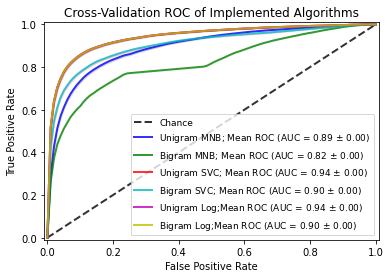

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Chance', alpha=.8)

one_gram_mnb_mean_tpr = np.mean(one_gram_mnb_tprs, axis=0)
one_gram_mnb_mean_tpr[-1] = 1.0
one_gram_mnb_mean_auc = metrics.auc(mean_fpr, one_gram_mnb_mean_tpr)
one_gram_mnb_std_auc = np.std(one_gram_mnb_aucs)
plt.plot(mean_fpr, one_gram_mnb_mean_tpr, color='b',
         label=r'Unigram MNB; Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (one_gram_mnb_mean_auc, one_gram_mnb_std_auc),
         lw=2, alpha=.8)

one_gram_mnb_std_tpr = np.std(one_gram_mnb_tprs, axis=0)
one_gram_mnb_tprs_upper = np.minimum(one_gram_mnb_mean_tpr + one_gram_mnb_std_tpr, 1)
one_gram_mnb_tprs_lower = np.maximum(one_gram_mnb_mean_tpr - one_gram_mnb_std_tpr, 0)
plt.fill_between(mean_fpr, one_gram_mnb_tprs_lower, one_gram_mnb_tprs_upper, color='grey', alpha=.2)

two_gram_mnb_mean_tpr = np.mean(two_gram_mnb_tprs, axis=0)
two_gram_mnb_mean_tpr[-1] = 1.0
two_gram_mnb_mean_auc = metrics.auc(mean_fpr, two_gram_mnb_mean_tpr)
two_gram_mnb_std_auc = np.std(two_gram_mnb_aucs)
plt.plot(mean_fpr, two_gram_mnb_mean_tpr, color='g',
         label=r'Bigram MNB; Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (two_gram_mnb_mean_auc, two_gram_mnb_std_auc),
         lw=2, alpha=.8)

two_gram_mnb_std_tpr = np.std(two_gram_mnb_tprs, axis=0)
two_gram_mnb_tprs_upper = np.minimum(two_gram_mnb_mean_tpr + two_gram_mnb_std_tpr, 1)
two_gram_mnb_tprs_lower = np.maximum(two_gram_mnb_mean_tpr - two_gram_mnb_std_tpr, 0)
plt.fill_between(mean_fpr, two_gram_mnb_tprs_lower, two_gram_mnb_tprs_upper, color='whitesmoke', alpha=.2)

one_gram_svc_mean_tpr = np.mean(one_gram_svc_tprs, axis=0)
one_gram_svc_mean_tpr[-1] = 1.0
one_gram_svc_mean_auc = metrics.auc(mean_fpr, one_gram_svc_mean_tpr)
one_gram_svc_std_auc = np.std(one_gram_svc_aucs)
plt.plot(mean_fpr, one_gram_svc_mean_tpr, color='r',
         label=r'Unigram SVC; Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (one_gram_svc_mean_auc, one_gram_svc_std_auc),
         lw=2, alpha=.8)

one_gram_svc_std_tpr = np.std(one_gram_svc_tprs, axis=0)
one_gram_svc_tprs_upper = np.minimum(one_gram_svc_mean_tpr + one_gram_svc_std_tpr, 1)
one_gram_svc_tprs_lower = np.maximum(one_gram_svc_mean_tpr - one_gram_svc_std_tpr, 0)
plt.fill_between(mean_fpr, one_gram_svc_tprs_lower, one_gram_svc_tprs_upper, color='chocolate', alpha=.2)

two_gram_svc_mean_tpr = np.mean(two_gram_svc_tprs, axis=0)
two_gram_svc_mean_tpr[-1] = 1.0
two_gram_svc_mean_auc = metrics.auc(mean_fpr, two_gram_svc_mean_tpr)
two_gram_svc_std_auc = np.std(two_gram_svc_aucs)
plt.plot(mean_fpr, two_gram_svc_mean_tpr, color='c',
         label=r'Bigram SVC; Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (two_gram_svc_mean_auc, two_gram_svc_std_auc),
         lw=2, alpha=.8)

two_gram_svc_std_tpr = np.std(two_gram_svc_tprs, axis=0)
two_gram_svc_tprs_upper = np.minimum(two_gram_svc_mean_tpr + two_gram_svc_std_tpr, 1)
two_gram_svc_tprs_lower = np.maximum(two_gram_svc_mean_tpr - two_gram_svc_std_tpr, 0)
plt.fill_between(mean_fpr, two_gram_svc_tprs_lower, two_gram_svc_tprs_upper, color='lightsalmon', alpha=.2)

one_gram_log_mean_tpr = np.mean(one_gram_log_tprs, axis=0)
one_gram_log_mean_tpr[-1] = 1.0
one_gram_log_mean_auc = metrics.auc(mean_fpr, one_gram_log_mean_tpr)
one_gram_log_std_auc = np.std(one_gram_log_aucs)
plt.plot(mean_fpr, one_gram_log_mean_tpr, color='m',
         label=r'Unigram Log;Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (one_gram_log_mean_auc, one_gram_log_std_auc),
         lw=2, alpha=.8)

one_gram_log_std_tpr = np.std(one_gram_log_tprs, axis=0)
one_gram_log_tprs_upper = np.minimum(one_gram_log_mean_tpr + one_gram_log_std_tpr, 1)
one_gram_log_tprs_lower = np.maximum(one_gram_log_mean_tpr - one_gram_log_std_tpr, 0)
plt.fill_between(mean_fpr, one_gram_log_tprs_lower, one_gram_log_tprs_upper, color='indigo', alpha=.2)

two_gram_log_mean_tpr = np.mean(two_gram_log_tprs, axis=0)
two_gram_log_mean_tpr[-1] = 1.0
two_gram_log_mean_auc = metrics.auc(mean_fpr, two_gram_log_mean_tpr)
two_gram_log_std_auc = np.std(two_gram_svc_aucs)
plt.plot(mean_fpr, one_gram_log_mean_tpr, color='y',
         label=r'Bigram Log;Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (two_gram_log_mean_auc, two_gram_log_std_auc),
         lw=2, alpha=.8)

two_gram_log_std_tpr = np.std(two_gram_log_tprs, axis=0)
two_gram_log_tprs_upper = np.minimum(two_gram_log_mean_tpr + two_gram_log_std_tpr, 1)
two_gram_log_tprs_lower = np.maximum(two_gram_log_mean_tpr - two_gram_log_std_tpr, 0)
plt.fill_between(mean_fpr, two_gram_log_tprs_lower, two_gram_log_tprs_upper, color='violet', alpha=.2)

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation ROC of Implemented Algorithms')
plt.legend(loc="below", prop={'size': 9})
plt.show()